In [1]:
"""
Based on document crated by Gokul
"""

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Importing the dataset
dataset=pd.read_excel('Data_Gokul.xlsx', sheet_name='Data Sheet')

# Creating the independent variable Set
X=pd.DataFrame(dataset.iloc[1:,1:4])

# Creating the Dependet variable set
y = pd.DataFrame(dataset.iloc[1:,4 ])

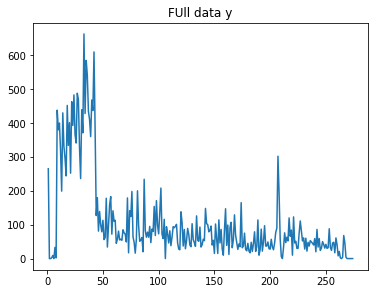

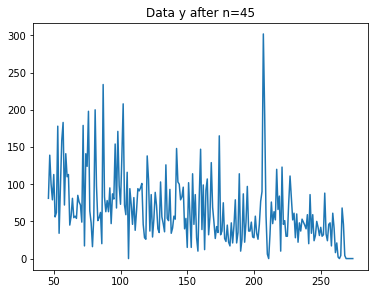

In [2]:
plt.figure(figsize=(6,10))
plt.subplot(211)
plt.plot(y)
plt.title("FUll data y")

plt.figure(figsize=(6,10))
plt.subplot(212)
plt.plot(y[45:])
plt.title("Data y after n=45")

plt.show()

The idea would be to use data from n=45

We can now now the relationship between the variables

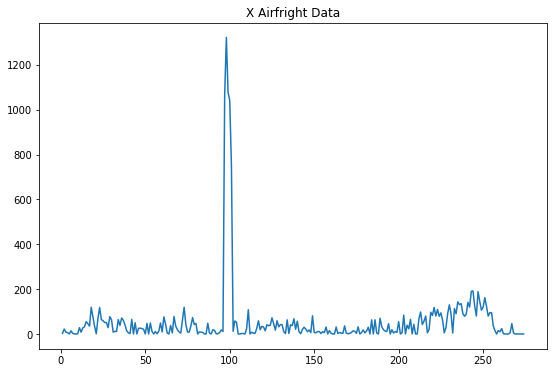

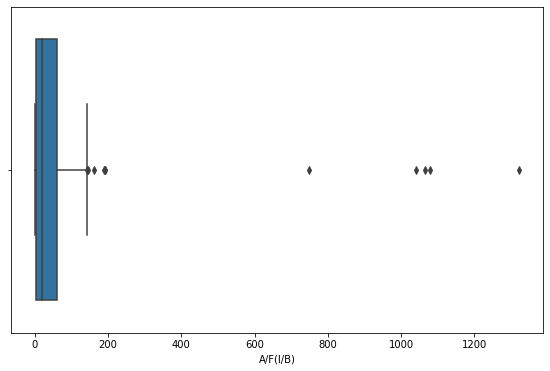

In [3]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(X.iloc[:,0])
plt.title("X Airfright Data")

plt.figure(figsize=(21,6))
plt.subplot(122)
sns.boxplot(X.iloc[:,0])

plt.show()

In [4]:
print("A/F(I/B) has {} zero values, which corresponds to {:.2%} of the total values".format(sum(X.iloc[:,0]==0),np.mean(X.iloc[:,0]==0))) 

A/F(I/B) has 40 zero values, which corresponds to 14.60% of the total values


In [5]:
# consdieramos solo los valores despues de n=45
y = y[45:]
X = X[45:]

In [6]:
X.head(3)

,A/F(I/B),CONT(I/B),TRAILER(I/B)
46,25,239,1355
47,26,246,1320
48,24,315,1291


In [7]:
y.head(3)

,A/F(O/B)
46,81
47,139
48,100


In [8]:
# normalizing the data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

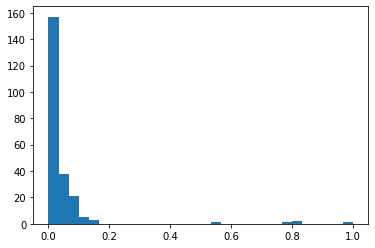

In [9]:
plt.hist(X.iloc[:,0], bins=30)
plt.show()

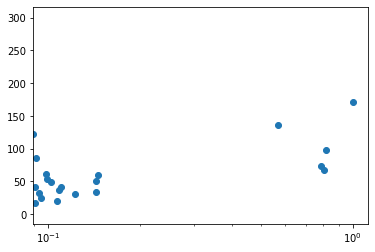

In [10]:
# plotting the data for Airfreight
plt.scatter(X.iloc[:,0],y)
plt.xscale("log")
plt.show()

In [11]:
# Scaling also y
y_scaled = min_max_scaler.fit_transform(y)
y = pd.DataFrame(y_scaled)

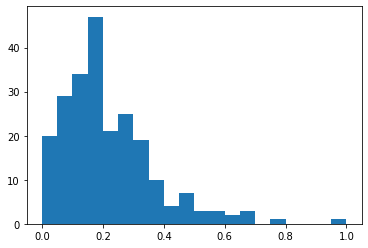

In [12]:
plt.hist(y.iloc[:,0],bins=20)
plt.show()

In [13]:
# Use SVM - Support Vector Machines

from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

/home/kathuman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [17]:
y

,0
0,0.268212
1,0.460265
2,0.331126
3,0.261589
4,0.374172
5,0.185430
6,0.205298
7,0.589404
8,0.112583
9,0.317881
